# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [3]:
!ls
import pandas as pd

Dataset TWO - Dogs.ipynb
NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx
boro_population.csv
zipcodes-neighborhoods.csv


## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [24]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=30000, na_values=["Unknown", "UNKNOWN"])

In [25]:
df.tail(50)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
29950,10034,RUBY,F,Beagle,NaN,BROWN,BLACK,WHITE,2005-06-01,Yes,No,Yes,2015-08-22 16:25:50.997,2015-08-22,2016-09-22
29951,11208,unknown,M,Labrador Retriever Crossbreed,NaN,White,Tan,NaN,2015-01-01,Yes,NaN,Yes,2015-08-22 16:27:21.623,2015-08-22,2016-08-22
29952,10023,DUDLEY,M,Yorkshire Terrier,NaN,BLACK,ORANGE,NaN,2006-12-01,Yes,No,Yes,2015-08-22 16:39:30.750,2015-08-22,2016-07-30
29953,11219,Coco,M,Norfolk Terrier,NaN,WHITE,CREAM,NaN,2014-05-01,No,No,No,2015-08-22 16:56:01.477,2015-08-22,2016-07-26
29954,11218,BAILEY,M,Lhasa Apso,NaN,TAN,BLACK,NaN,2008-03-01,Yes,No,Yes,2015-08-22 16:57:37.073,2015-08-22,2016-09-24
29955,10005,Bili,M,Maltese,NaN,White,NaN,NaN,2015-05-01,No,NaN,Yes,2015-08-22 17:09:46.157,2015-08-22,2016-08-22
29956,10032,Dante,M,NaN,NaN,TAN,APRICOT,NaN,2011-05-01,Yes,No,Yes,2015-08-22 17:11:09.457,2015-08-22,2016-08-06
29957,11429,Portland,M,American Pit Bull Mix / Pit Bull Mix,NaN,Gray,NaN,NaN,2014-04-01,Yes,NaN,Yes,2015-08-22 17:13:14.537,2015-08-22,2016-08-22
29958,10011,Remy,M,Italian Greyhound,NaN,BROWN,NaN,NaN,2008-01-01,Yes,No,Yes,2015-08-22 17:13:38.043,2015-08-22,2016-09-24
29959,10309,Bailey,M,Shih Tzu,NaN,WHITE,BROWN,BLACK,2008-04-01,Yes,No,Yes,2015-08-22 17:14:30.183,2015-08-22,2018-08-06


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [26]:
df.shape

(30000, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is a dog owned and licensed by a human. "Animal Birth" is the dogs birthday, "Primary Breed" could mean the most obvious breed the dog is, if its mixed.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

How many pitbull mixes are in the list?
What are the most common dog names on this list?
What's up with the dogs that are not vaccinated?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [27]:
df['Primary Breed'].value_counts().head(10)

Primary Breed
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: count, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [28]:
#did the thing in the first part to take away unknowns. Was that correct?

## What are the most popular dog names?

In [31]:
df['Animal Name'].value_counts().head(10)

Animal Name
Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [33]:
#^means the start of a line
# .* meand match anything
# \w+ means match a word
# \d+ means match numbers
# \s meand spaces and tabs and something else
# [\w\s]+
df[df['Animal Name'].str.contains("Laura", na=False)]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
10375,10021,Laura,F,Labrador Retriever,NaN,Tan,NaN,NaN,2013-04-01,Yes,NaN,Yes,2015-06-02 16:11:15.630,2015-06-02,2016-06-02


In [47]:
only_maxes_df = df[df['Animal Name'].str.contains("^Max \W", na=False)]
only_maxes_df['Animal Name'].count()

15

In [60]:
maxwells_df = df[df['Animal Name'].str.contains("^Maxwell", na=False)]
maxwells_df['Animal Name'].count()

19

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [88]:
guard_counts = df['Guard or Trained'].value_counts(dropna=False)
guard_dogs_count = guard_counts.get('Yes', 0)
total_dogs_count = guard_counts.sum()
percentage_guard_dogs = (guard_dogs_count / total_dogs_count) * 100
print(percentage_guard_dogs, "%")

0.05666666666666667 %


## What are the actual numbers?

In [84]:
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [ ]:
#It is, because I included the NaN's in the count.

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [86]:
df['Guard or Trained'].fillna('No', inplace=True)
guard_counts_updated = df['Guard or Trained'].value_counts()
print(guard_counts_updated)

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64


## What are the top dog breeds for guard dogs? 

In [92]:
guards_df = df[df['Guard or Trained'].str.contains("Yes")]
guards_df['Primary Breed'].value_counts().head()

Primary Breed
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [93]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,No,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [94]:
df['age'] = 2023 - df['year'] 
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,16
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,10
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,9
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,15
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010,13
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010,13
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,No,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014,9
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009,14


# Joining data together

In [96]:
boroughs_df = pd.read_csv("zipcodes-neighborhoods.csv")
boroughs_df

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
...,...,...,...
173,South Shore,10312,Staten Island
174,Stapleton and St. George,10301,Staten Island
175,Stapleton and St. George,10304,Staten Island
176,Stapleton and St. George,10305,Staten Island


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [98]:
merged = df.merge(boroughs_df, left_on='Owner Zip Code', right_on='zip')
merged

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,16,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,15,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,12,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,12,Upper West Side,10024,Manhattan
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,16,Upper West Side,10024,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29568,11436,Jack,M,Jack Russell Terrier,NaN,WHITE,BLACK,BROWN,2010-01-01,Yes,No,Yes,2015-08-09 17:43:18.710,2015-08-09,2016-08-10,2010,13,Jamaica,11436,Queens
29569,11436,ROXY,F,NaN,\HAR PEI X,BLACK,NaN,NaN,2003-01-01,Yes,No,Yes,2015-08-12 06:37:28.877,2015-08-12,2017-08-30,2003,20,Jamaica,11436,Queens
29570,11436,marco,M,Yorkshire Terrier,NaN,BROWN,GRAY,NaN,2009-01-01,No,No,Yes,2015-08-13 10:20:46.697,2015-08-13,2016-08-20,2009,14,Jamaica,11436,Queens
29571,11436,Maximilian,M,Shih Tzu,NaN,WHITE,TAN,NaN,2004-01-01,Yes,No,Yes,2015-08-19 11:49:32.743,2015-08-19,2016-08-30,2004,19,Jamaica,11436,Queens


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [116]:
bronx_df = merged[merged['borough'].str.contains("Bronx", case=False)]
pop_names_bronx = bronx_df['Animal Name'].value_counts().head()
print(pop_names_bronx)

Animal Name
Bella       22
Max         21
Rocky       20
Lucky       15
Princess    15
Name: count, dtype: int64


In [121]:
brooklyn_df = merged[merged['borough'].str.contains("Brooklyn", case=False)]
pop_names_brooklyn = brooklyn_df['Animal Name'].value_counts().head()
print(pop_names_brooklyn)

Animal Name
Max        46
unknown    45
Bella      45
Charlie    42
Rocky      36
Name: count, dtype: int64


In [122]:
ues_df = merged[merged['neighborhood'].str.contains("Upper East Side", case=False)]
pop_names_ues = ues_df['Animal Name'].value_counts().head()
print(pop_names_ues)

Animal Name
Charlie    19
Bella      12
NO NAME    11
Lola       10
Lucy       10
Name: count, dtype: int64


## What is the most common dog breed in each of the neighborhoods of NYC?

In [165]:
top_breeds = merged.groupby('neighborhood')['Primary Breed'].value_counts().groupby('neighborhood').nlargest(1)
print(top_breeds)

neighborhood                   neighborhood                   Primary Breed                       
Borough Park                   Borough Park                   Yorkshire Terrier                        49
Bronx Park and Fordham         Bronx Park and Fordham         Yorkshire Terrier                        39
Bushwick and Williamsburg      Bushwick and Williamsburg      Yorkshire Terrier                        47
Canarsie and Flatlands         Canarsie and Flatlands         Shih Tzu                                 56
Central Bronx                  Central Bronx                  Yorkshire Terrier                        29
Central Brooklyn               Central Brooklyn               Shih Tzu                                 52
Central Harlem                 Central Harlem                 Chihuahua                                48
Central Queens                 Central Queens                 Yorkshire Terrier                        34
Chelsea and Clinton            Chelsea and Clinton   

## What breed of dogs are the least likely to be spayed? Male or female?

In [146]:
spayed_breed = merged.groupby('Primary Breed')['Spayed or Neut'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
spayed_percentage_by_breed = spayed_breed.reset_index(name='Spayed Percentage')
least_spayed_breed = spayed_percentage_by_breed[spayed_percentage_by_breed['Spayed Percentage'] == spayed_percentage_by_breed['Spayed Percentage'].min()]
print(least_spayed_breed)

                           Primary Breed  Spayed Percentage
40                                Borzoi                0.0
54                            Canaan Dog                0.0
90                        Dogo Argentino                0.0
100                      Fila Brasileiro                0.0
104                       French Spaniel                0.0
132                    Karelian Bear Dog                0.0
135                        Kooikerhondje                0.0
152  Mastiff, French (Dogue de Bordeaux)                0.0
155                     Mastiff, Tibetan                0.0
161                                 Mudi                0.0
180                         Polish Hound                0.0
232            Treeing Tennessee Brindle                0.0


In [149]:
spayed_gender = merged.groupby('Animal Gender')['Spayed or Neut'].apply(lambda x: (x == 'Yes').mean() * 100)
spayed_gender = spayed_gender.reset_index(name='Spayed Percentage')

print(spayed_gender)

  Animal Gender  Spayed Percentage
0                       100.000000
1             F          85.756458
2             M          79.132335


## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [177]:
def is_monochrome(colors):
    valid_colors = {'Black', 'White', 'Grey'}
    if isinstance(colors, str):
        animal_colors = set(colors.split(', '))
        return animal_colors.issubset(valid_colors)
    return False
color_columns = ['Animal Dominant Color', 'Animal Secondary Color', 'Animal Third Color']
merged['Color'] = merged[color_columns].fillna('').apply(lambda x: ', '.join(x), axis=1)
merged['monochrome'] = merged['Color'].apply(is_monochrome)
num_monochrome_animals = merged['monochrome'].sum()
print(f'The number of monochrome animals is: {num_monochrome_animals}')

The number of monochrome animals is: 69


## How many dogs are in each borough? Plot it in a graph.

<Axes: ylabel='borough'>

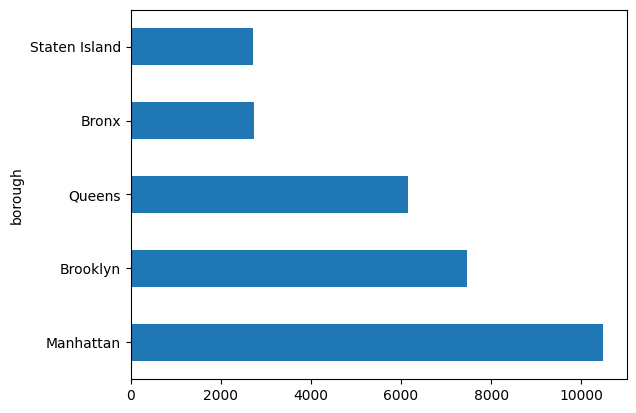

In [152]:
merged['borough'].value_counts().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [179]:
population_df = pd.read_csv("boro_population.csv")
population_df

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [183]:
merged_population = pd.merge(merged, population_df, on='borough')
dogs_per_borough = merged_population.groupby('borough')['Animal Name'].count().reset_index(name='Total Dogs')
borough_population = merged_population.groupby('borough')['population'].max().reset_index()
dogs_population = pd.merge(dogs_per_borough, borough_population, on='borough')
dogs_population['Dogs Per Capita'] = dogs_population['Total Dogs'] / dogs_population['population']
max_dogs_per_capita = dogs_population[dogs_population['Dogs Per Capita'] == dogs_population['Dogs Per Capita'].max()]

print("Borough with the highest number of dogs per capita:")
print(max_dogs_per_capita)

Borough with the highest number of dogs per capita:
     borough  Total Dogs  population  Dogs Per Capita
2  Manhattan       10320     1644518         0.006275


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

<Figure size 1200x800 with 0 Axes>

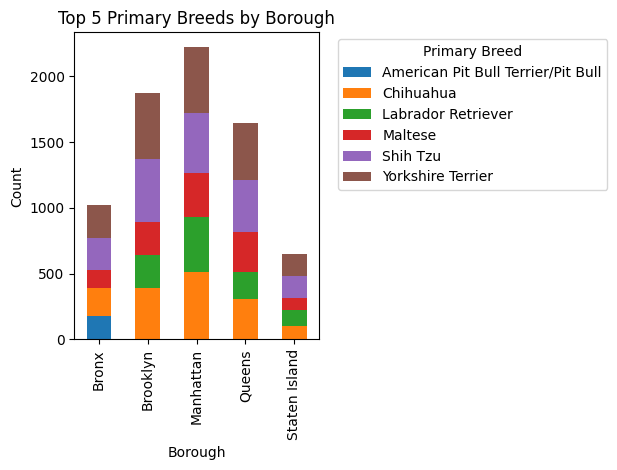

In [172]:
#merged.groupby('borough')['Primary Breed'].value_counts().groupby('borough').nlargest(5)
#merged.groupby('borough')['Primary Breed'].value_counts().groupby('borough').head(5).plot(kind='barh')
import matplotlib.pyplot as plt
top_breeds_by_borough = merged.groupby('borough')['Primary Breed'].value_counts().groupby('borough').head(5).reset_index(name='Count')
pivot_data = top_breeds_by_borough.pivot(index='borough', columns='Primary Breed', values='Count').fillna(0)
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True)
plt.title('Top 5 Primary Breeds by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.legend(title='Primary Breed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## What percentage of dogs are not guard dogs?

In [162]:
not_guard_counts = df['Guard or Trained'].value_counts(dropna=False)
not_guard_dogs_count = not_guard_counts.get('No', 0)
total_dogs_count = not_guard_counts.sum()
percentage_not_guard_dogs = (not_guard_dogs_count / total_dogs_count) * 100
print(percentage_not_guard_dogs, "%")

99.94333333333333 %
